In [10]:
import os
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz 
import matplotlib.pyplot as plt
from IPython.display import Image
import time
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("data/winequality.csv")
print(data.shape)
X = data.iloc[:,:11]
y = data.iloc[:,11]
train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size=0.1)
train_X,val_X,train_y,val_y = train_test_split(X, y, random_state=0, test_size=0.1)
features = list(train_X.columns.values)


(3918, 13)


In [3]:
accuracy = dict()
best_tree = None
best_info = (0,0,None)
for d in range(1,40):
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=d)
    clf_gini.fit(train_X,train_y)
    
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state =0,
                               max_depth=d)
    clf_entropy.fit(train_X,train_y)
    
    gini_predict = clf_gini.predict(val_X)
    entropy_predict = clf_entropy.predict(val_X)
    train_gini_predict = clf_gini.predict(train_X)
    train_entropy_predict = clf_entropy.predict(train_X)
    
    g_accuracy = np.sum(gini_predict == val_y) / val_y.shape[0]
    e_accuracy = np.sum(entropy_predict == val_y) / val_y.shape[0]
    train_g_accuracy = np.sum(train_gini_predict == train_y) / train_y.shape[0]
    train_e_accuracy = np.sum(train_entropy_predict == train_y) / train_y.shape[0]
    accuracy[d] = (g_accuracy,e_accuracy,train_g_accuracy,train_e_accuracy)
    
    best_temp = (0,None)
    if g_accuracy > e_accuracy:
        best_temp = (g_accuracy,'gini')
    else:
        best_temp = (e_accuracy,'entropy')
    if best_temp[0] > best_info[0]:
        best_info = (best_temp[0],d,best_temp[1])

In [4]:
list_g = list()
list_e = list()
train_list_g = list()
train_list_e = list()
for k,v in accuracy.items():
    print("depth: ",k,", entropy accuracy: ",v[1],", gini accuracy: ",v[0])
    list_g.append(v[0])
    list_e.append(v[1])
    train_list_g.append(v[2])
    train_list_e.append(v[3])
print ("best tree: depth: ",best_info[1],", split function: ",best_info[2],", accuracy: ",best_info[0])

depth:  1 , entropy accuracy:  0.45918367346938777 , gini accuracy:  0.45918367346938777
depth:  2 , entropy accuracy:  0.5076530612244898 , gini accuracy:  0.5229591836734694
depth:  3 , entropy accuracy:  0.5102040816326531 , gini accuracy:  0.5153061224489796
depth:  4 , entropy accuracy:  0.5510204081632653 , gini accuracy:  0.5153061224489796
depth:  5 , entropy accuracy:  0.5459183673469388 , gini accuracy:  0.5459183673469388
depth:  6 , entropy accuracy:  0.5535714285714286 , gini accuracy:  0.548469387755102
depth:  7 , entropy accuracy:  0.5306122448979592 , gini accuracy:  0.5382653061224489
depth:  8 , entropy accuracy:  0.5433673469387755 , gini accuracy:  0.5535714285714286
depth:  9 , entropy accuracy:  0.5459183673469388 , gini accuracy:  0.5688775510204082
depth:  10 , entropy accuracy:  0.5306122448979592 , gini accuracy:  0.5612244897959183
depth:  11 , entropy accuracy:  0.5306122448979592 , gini accuracy:  0.5714285714285714
depth:  12 , entropy accuracy:  0.538265

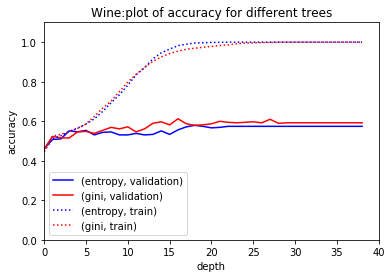

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot(range(len(list_e)),list_e,'b-',label="(entropy, validation)")
plt.plot(range(len(list_g)),list_g,'r-',label="(gini, validation)")
plt.plot(range(len(list_e)),train_list_e,'b:',label="(entropy, train)")
plt.plot(range(len(list_g)),train_list_g,'r:',label="(gini, train)")
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('Wine:plot of accuracy for different trees')
plt.legend()
plt.axis([0,40,0,1.1])
plt.show()
plt.savefig("DT_wine_2.jpg")

In [6]:
clf = DecisionTreeClassifier(criterion = best_info[2], random_state = 0,
                               max_depth=best_info[1])
clf.fit(train_X,train_y)
predict = clf.predict(test_X)
accuracy = np.sum(predict == test_y) / test_y.shape[0]
print("bset tree test accurcy: ",accuracy)

bset tree test accurcy:  0.6122448979591837


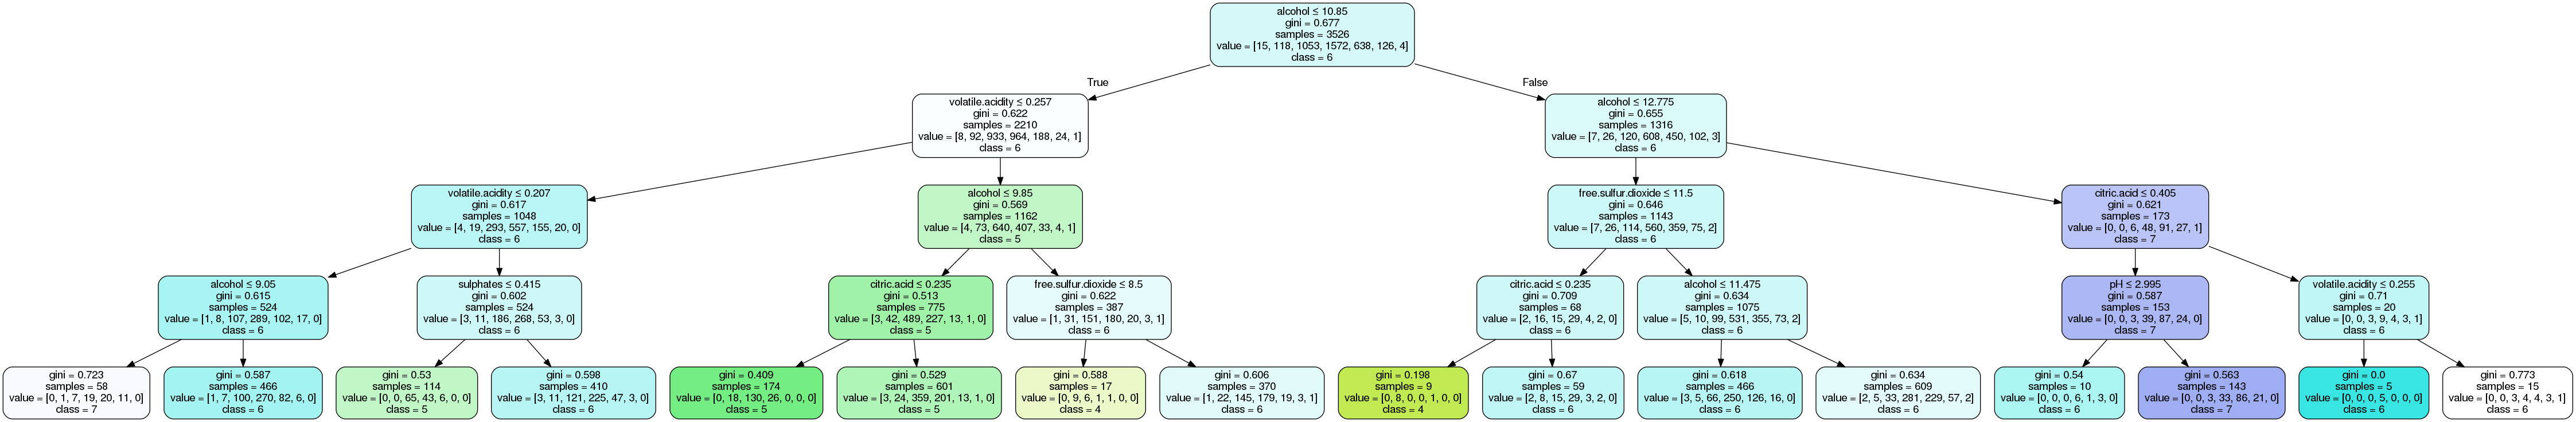

In [7]:
tree.export_graphviz(clf, out_file='tree.dot', 
                        feature_names=features,  
                         class_names=list(map(str, set(y))),  
                         filled=True, rounded=True,  
                         special_characters=True) 
os.system("dot -Tpng tree.dot -o tree.png")
os.system("tree.png")
Image(filename='tree.png')

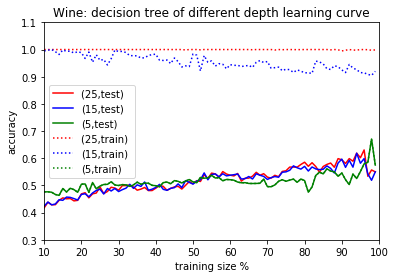

In [9]:
deep_grow_accuracy = list()
middle_grow_accuracy = list()
small_grow_accuracy = list()
train_1 = list()
train_2 = list()
train_3 = list()
for p in range(10,100):
    train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size= 1-p/100)
    
    deep_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=25)
    deep_clf_gini.fit(train_X,train_y)
    deep_gini_predict = deep_clf_gini.predict(test_X)
    deep_g_accuracy = np.sum(deep_gini_predict == test_y) / test_y.shape[0]
    deep_grow_accuracy.append(deep_g_accuracy)
    tdeep_gini_predict = deep_clf_gini.predict(train_X)
    tdeep_g_accuracy = np.sum(tdeep_gini_predict == train_y) / train_y.shape[0]
    train_1.append(tdeep_g_accuracy)
    
   
    middle_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=15)
    middle_clf_gini.fit(train_X,train_y)
    middle_gini_predict = middle_clf_gini.predict(test_X)
    middle_g_accuracy = np.sum(middle_gini_predict == test_y) / test_y.shape[0]
    middle_grow_accuracy.append(middle_g_accuracy)
    tmiddle_gini_predict = middle_clf_gini.predict(train_X)
    tmiddle_g_accuracy = np.sum(tmiddle_gini_predict == train_y) / train_y.shape[0]
    train_2.append(tmiddle_g_accuracy)

    small_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=5)
    small_clf_gini.fit(train_X,train_y)
    small_gini_predict = small_clf_gini.predict(test_X)
    small_g_accuracy = np.sum(small_gini_predict == test_y) / test_y.shape[0]
    small_grow_accuracy.append(small_g_accuracy)
    tsmall_gini_predict = small_clf_gini.predict(train_X)
    tsmall_g_accuracy = np.sum(tsmall_gini_predict == train_y) / train_y.shape[0]
    train_3.append(small_g_accuracy)

plt.plot(range(10,100),deep_grow_accuracy,'r-',label="(25,test) ")
plt.plot(range(10,100),middle_grow_accuracy,'b-',label="(15,test)")
plt.plot(range(10,100),small_grow_accuracy,'g-',label="(5,test)")

plt.plot(range(10,100),train_1,'r:',label="(25,train) ")
plt.plot(range(10,100),train_2,'b:',label="(15,train)")
plt.plot(range(10,100),train_3,'g:',label="(5,train)")

plt.xlabel('training size %')
plt.ylabel('accuracy')
plt.title('Wine: decision tree of different depth learning curve')
plt.axis([10,100,0.3, 1.1])
plt.legend()
plt.savefig("DT_wine_2.jpg")
plt.show()


In [13]:
train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size= 0.2)
start = time.clock()
model = DecisionTreeClassifier(criterion = "gini", random_state = 0,max_depth=5)
model.fit(train_X,train_y)
predict = model.predict(test_X)
elapsed = (time.clock() - start)
print("decision tree model accuracy: ",accuracy_score(predict,test_y),"time used : ",elapsed)

decision tree model accuracy:  0.5178571428571429 time used :  0.019019900000103007


C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
